In [1]:
import pandas as pd

In [2]:
# Load the dataset in Python environment
data=pd.read_csv('/content/train_loan.csv')
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


 **Missing value handling**

In [3]:
# We need to find the missing values in each column and fill it with suitable values
# For categorical data we can fill it with  mode values
# For numerical data , we can use mean and if its skewed data then we can use median values

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data['Gender'].mode()

,Gender
0,Male


In [8]:
data['Gender']=data['Gender'].fillna('Male')

In [9]:
data['Married'].mode()

,Married
0,Yes


In [10]:
data['Married']=data['Married'].fillna('Yes')

In [11]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
data['Dependents'].mode()
data['Dependents']=data['Dependents'].fillna('0')

In [13]:
data['Self_Employed'].mode()

,Self_Employed
0,No


In [14]:
data['Self_Employed']=data['Self_Employed'].fillna('No')


In [15]:
import matplotlib.pyplot as plt

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

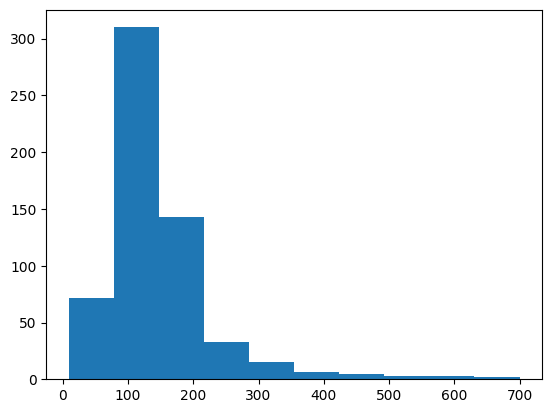

In [16]:
plt.hist(data['LoanAmount'])

In [17]:
data['LoanAmount'].median()

128.0

In [18]:
data['LoanAmount']=data['LoanAmount'].fillna(128.0)

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 512.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <BarContainer object of 10 artists>)

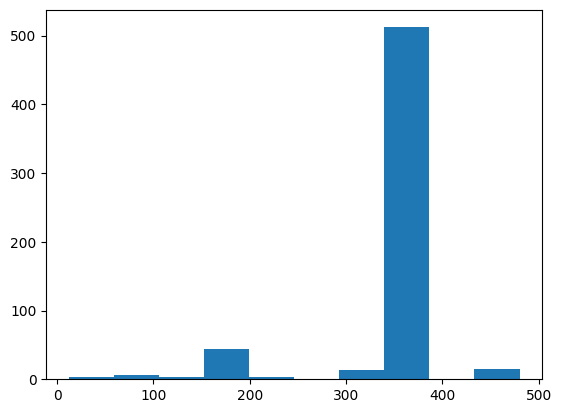

In [19]:
plt.hist(data['Loan_Amount_Term'])

In [20]:
data['Loan_Amount_Term'].median()

360.0

In [21]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(360.0)

In [22]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [23]:
data['Credit_History'].mode()

,Credit_History
0,1.0


In [24]:
data['Credit_History']=data['Credit_History'].fillna('1.0')

In [25]:
data['Credit_History'] = pd.to_numeric(data['Credit_History'], errors='coerce')
data['Credit_History'] = data['Credit_History'].astype(int)

In [26]:
data['Credit_History'].unique()

array([1, 0])

In [27]:
data.duplicated().sum()

0

In [28]:
data.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


**b. Outlier detection**

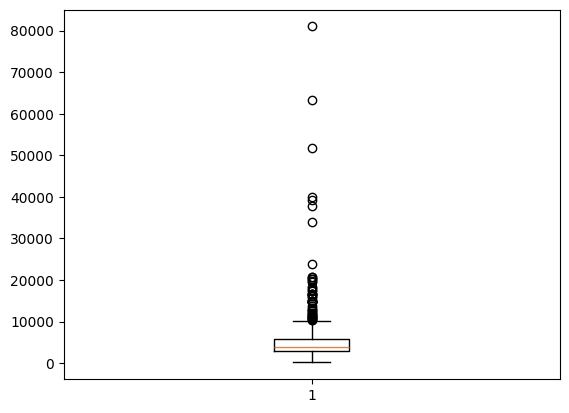

In [29]:
# outliers are data points that differ significantly from other observations in a dataset.
# For outlier detection we can use boxplot


plt.boxplot(data['ApplicantIncome'])
plt.show()

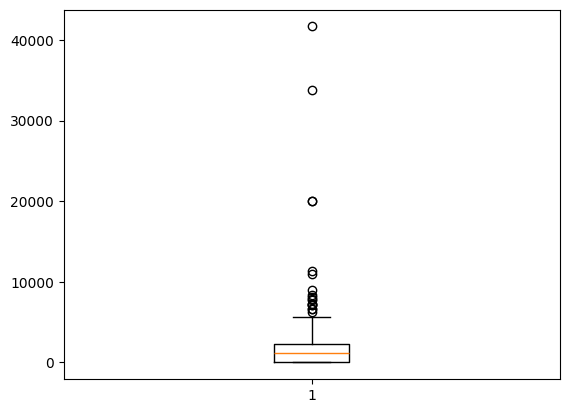

In [30]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

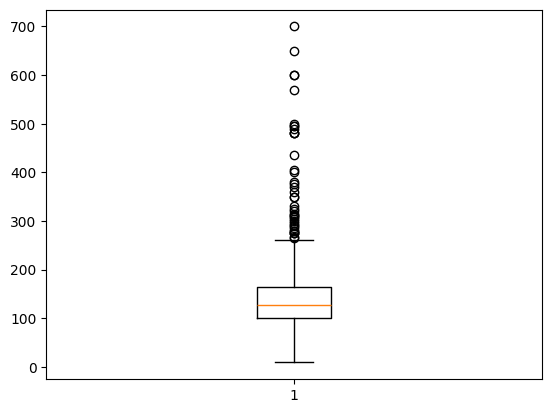

In [31]:
plt.boxplot(data['LoanAmount'])
plt.show()

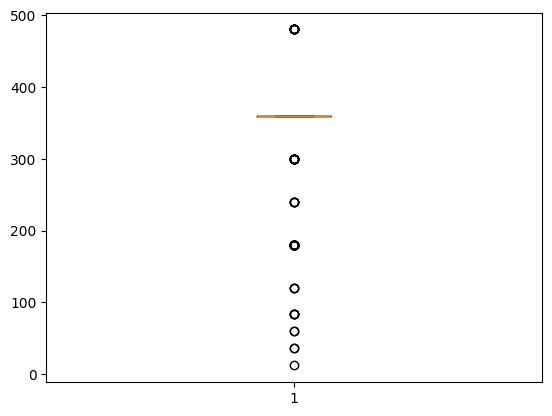

In [32]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

c. **Encoding**

In [33]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [34]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [35]:
data['Dependents']=data['Dependents'].replace('3+',3)
data['Dependents']=data['Dependents'].astype(int)

In [36]:
data['LoanAmount']=data['LoanAmount'].astype(int)

In [37]:
data['CoapplicantIncome'].dtype

dtype('float64')

In [38]:
data['ApplicantIncome'].dtype

dtype('int64')

In [39]:
data['CoapplicantIncome']=data['CoapplicantIncome'].replace('.0',' ').astype(int)

In [40]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,int64
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,int64
Loan_Amount_Term,float64


In [41]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = pd.DataFrame(encoder.fit_transform(data[['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']]),
                           columns=encoder.get_feature_names_out(['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']))

data = data.drop(['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'], axis=1)
data = pd.concat([data, encoded_data], axis=1)

**Scaling**


In [42]:
#  we are using MinMaxScaler
# Firstly Create a MinMaxScaler object
# Reshape the numerical columns
# Fit the scale
# We have numerical columns {ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term} for scailing

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
applicant_income = data['ApplicantIncome'].values.reshape(-1, 1)
scaler.fit(applicant_income)
data['ApplicantIncome'] = scaler.transform(applicant_income)

In [43]:
coapplicant_income = data['CoapplicantIncome'].values.reshape(-1, 1)
scaler.fit(coapplicant_income)
data['CoapplicantIncome'] = scaler.transform(coapplicant_income)

In [44]:
LoanAmount= data['LoanAmount'].values.reshape(-1, 1)
scaler.fit(LoanAmount)
data['LoanAmount'] = scaler.transform(LoanAmount)

In [45]:
Loan_Amount_Term= data['Loan_Amount_Term'].values.reshape(-1, 1)
scaler.fit(Loan_Amount_Term)
data['Loan_Amount_Term'] = scaler.transform(Loan_Amount_Term)

In [49]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,0.064978,0.038910,0.197905,0.706005,0.855049,0.182410,0.817590,0.346906,0.653094,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990,0.312704,0.687296
std,1.009623,0.075560,0.070229,0.121718,0.137668,0.352339,0.386497,0.386497,0.476373,0.476373,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229,0.463973,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033735,0.000000,0.132055,0.743590,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.045300,0.028524,0.172214,0.743590,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.069821,0.055134,0.225398,0.743590,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
